# Daten analysieren

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

my_random_state = 10

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.sample(10, random_state = 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
456,1,135,54,0,0,26.7,0.687,62,0
260,3,191,68,15,130,30.9,0.299,34,0
651,1,117,60,23,106,33.8,0.466,27,0
143,10,108,66,0,0,32.4,0.272,42,1
666,4,145,82,18,0,32.5,0.235,70,1
390,1,100,66,29,196,32.0,0.444,42,0
591,2,112,78,50,140,39.4,0.175,24,0
77,5,95,72,33,0,37.7,0.370,27,0
414,0,138,60,35,167,34.6,0.534,21,1
494,3,80,0,0,0,0.0,0.174,22,0


In [3]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Was fällt auf?
* Das Minimum von Glucose, BloodPressure, SkinThicknes, Insulin und BMI ist 0
* Erstes Quartal bei SkinThickness und Insulin ist 0
* Insulin hat einen maximalen Wert von 846

In [5]:
zero_count_dict = {}
for col in diabetes_data.columns:
    print('', col, diabetes_data[col].value_counts()[diabetes_data[col].value_counts().index == 0.0].values)  

 Pregnancies [111]
 Glucose [5]
 BloodPressure [35]
 SkinThickness [227]
 Insulin [374]
 BMI [11]
 DiabetesPedigreeFunction []
 Age []
 Outcome [500]


In [6]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Train-Test-Split

array([<AxesSubplot: ylabel='0'>], dtype=object)

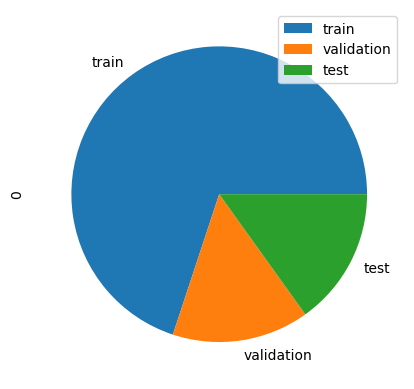

In [7]:
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=my_random_state, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full,random_state=my_random_state, test_size=0.5, stratify=y_test_full)

pd.DataFrame([len(y_train), len(y_val), len(y_test)], index=['train', 'validation', 'test']).plot(kind='pie', subplots=True)

0    350
1    187
Name: Outcome, dtype: int64

0    75
1    40
Name: Outcome, dtype: int64

0    75
1    41
Name: Outcome, dtype: int64

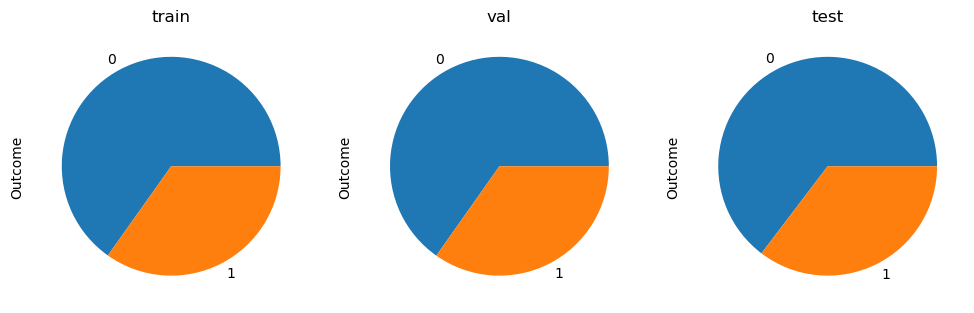

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))
y_train.value_counts().plot(kind='pie', ax=ax1, title='train')
y_val.value_counts().plot(kind='pie', ax=ax2, title='val')
y_test.value_counts().plot(kind='pie', ax=ax3, title='test')
display(y_train.value_counts())
display(y_val.value_counts())
display(y_test.value_counts())

## Alle 0 Werte entfernen

In [9]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data = diabetes_data.drop(diabetes_data[(diabetes_data.Glucose != 0) & (diabetes_data.SkinThickness != 0) & (diabetes_data.BloodPressure != 0) & (diabetes_data.Insulin != 0) & (diabetes_data.BMI != 0)].index)
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               376 non-null    int64  
 1   Glucose                   376 non-null    int64  
 2   BloodPressure             376 non-null    int64  
 3   SkinThickness             376 non-null    int64  
 4   Insulin                   376 non-null    int64  
 5   BMI                       376 non-null    float64
 6   DiabetesPedigreeFunction  376 non-null    float64
 7   Age                       376 non-null    int64  
 8   Outcome                   376 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.4 KB


### Fazit
Es bleiben nur noch 376 Reihen von 768 über.

# Model trainieren

## Korrelation

In [10]:
diabetes_data = pd.read_csv('diabetes.csv')
correlation = diabetes_data.corr().sort_values('Outcome', ascending=False)
correlation['Outcome']

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [11]:
def train_and_find_best_depth_decision(X_train, X_val, y_train, y_val, do_print):
    result = None
    accuracy_max = -1
    
    for curr_max_depth in range(1, 20):
        dt_model = DecisionTreeClassifier(max_depth=curr_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        accuracy_score = metrics.recall_score(y_val, y_pred)
        if accuracy_score >= accuracy_max:
            accuracy_max = accuracy_score
            result = curr_max_depth
    if do_print:
        print('-' * 20)
        print('best max depth {} has {:.2%} recall.'.format(result, accuracy_max))

    return result

In [12]:
def train_and_find_best_depth(X_train, X_val, y_train, y_val, do_print):
    result = None
    recall_max = -1
    precision_max = -1
    
    for curr_max_depth in range(1, 300):
        dt_model = RandomForestClassifier(max_depth=curr_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        recall_score = metrics.recall_score(y_val, y_pred)
        precision_score = metrics.precision_score(y_val, y_pred)
        if (recall_score >= recall_max) :
            recall_max = recall_score
            precision_max = precision_score
            result = curr_max_depth
    if do_print:
        print('-' * 20)
        print('best max depth {} has {:.2%} recall and has {:.2%} precision.'.format(result, recall_max, precision_max))

    return result

def train_and_find_best_estimators(X_train, X_val, y_train, y_val, best_max_depth, do_print):
    result = None
    recall_max = -1
    precision_max = -1
    
    for curr_estimators_depth in range(1, 100):
        dt_model = RandomForestClassifier(n_estimators= curr_estimators_depth, max_depth= best_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        recall_score = metrics.recall_score(y_val, y_pred)
        precision_score = metrics.precision_score(y_val, y_pred)
        if (recall_score >= recall_max) :
            recall_max = recall_score
            precision_max = precision_score
            result = curr_estimators_depth
    if do_print:
        print('-' * 20)
        print('best max estimators {} has {:.2%} recall and has {:.2%} precision.'.format(result, recall_max, precision_max))
        
    return result

def train_and_find_best_samples_split(X_train, X_val, y_train, y_val, best_max_depth, best_max_esitmators, do_print):
    result = None
    recall_max = -1
    precision_max = -1
    
    for curr_samples_split_depth in range(2, 200):
        dt_model = RandomForestClassifier(min_samples_split= curr_samples_split_depth, n_estimators= best_max_esitmators, max_depth= best_max_depth, random_state=my_random_state)
        dt_model.fit(X_train, y_train)
        y_pred = dt_model.predict(X_val)
        recall_score = metrics.recall_score(y_val, y_pred)
        precision_score = metrics.precision_score(y_val, y_pred)
        if (recall_score >= recall_max):
            recall_max = recall_score
            precision_max = precision_score
            result = curr_samples_split_depth
    if do_print:
        print('-' * 20)
        print('best max sample split {} has {:.2%} recall and has {:.2%} precision.'.format(result, recall_max, precision_max))

    return result

## Spalten mit vielen 0 Werten entfernen & Reihen mit 0 Werten entfernen mit UnderSampling, OverSampling und Kombination

In [13]:
y_train.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
y_train.drop(y_train[X_train.Glucose == 0].index, inplace=True)
y_train.drop(y_train[X_train.BloodPressure == 0].index, inplace=True)
y_train.drop(y_train[X_train.BMI == 0].index, inplace=True)

X_train.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_train.drop(X_train[X_train.Glucose == 0].index, inplace=True)
X_train.drop(X_train[X_train.BloodPressure == 0].index, inplace=True)
X_train.drop(X_train[X_train.BMI == 0].index, inplace=True)

y_val.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_val.drop(columns=['SkinThickness', 'Insulin'], inplace=True)

y_test.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_test.drop(columns=['SkinThickness', 'Insulin'], inplace=True)

### UnderSampling

In [14]:
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=my_random_state)
X_under, y_under = undersampler.fit_resample(X_train, y_train)
display(y_under.value_counts())

dt_model = DecisionTreeClassifier(random_state=my_random_state)
dt_model.fit(X_under, y_under)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

0    174
1    174
Name: Outcome, dtype: int64

Accuracy: 66.09%
Precision: 50.98%
Recall: 65.00%
F1: 57.14%


### OverSampling

In [15]:
oversampler = RandomOverSampler(sampling_strategy=1, random_state=my_random_state)
X_over, y_over = oversampler.fit_resample(X_train, y_train)
display(y_over.value_counts())

dt_model = DecisionTreeClassifier(random_state=my_random_state)
dt_model.fit(X_over, y_over)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

0    333
1    333
Name: Outcome, dtype: int64

Accuracy: 70.43%
Precision: 57.50%
Recall: 57.50%
F1: 57.50%


### Kombination von OverSampling und UnderSampling

In [16]:
oversampler = RandomOverSampler(sampling_strategy=0.8, random_state=my_random_state)
X_mix, y_mix = oversampler.fit_resample(X_train, y_train)
display(y_mix.value_counts())
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=my_random_state)
X_mix, y_mix = undersampler.fit_resample(X_mix, y_mix)
display(y_mix.value_counts())

0    333
1    266
Name: Outcome, dtype: int64

0    266
1    266
Name: Outcome, dtype: int64

### DecisionTreeClassifier

In [17]:
best_max_depth = train_and_find_best_depth_decision(X_train, X_val, y_train, y_val, True)

--------------------
best max depth 4 has 75.00% recall.


Accuracy: 66.96%
Precision: 51.79%
Recall: 72.50%
F1: 60.42%


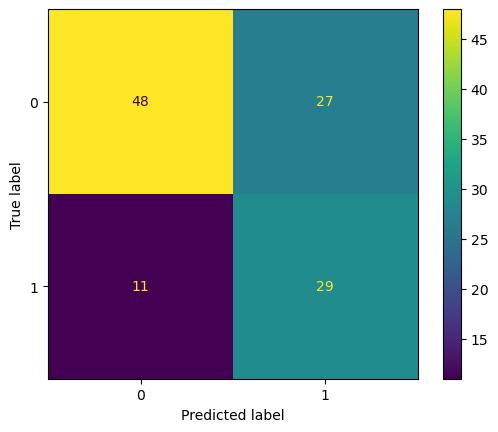

In [18]:
dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=my_random_state)
dt_model.fit(X_mix, y_mix)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### RandomForstClassifier

In [19]:
best_max_depth = train_and_find_best_depth(X_mix, X_val, y_mix, y_val, True)
best_max_estimators = train_and_find_best_estimators(X_mix, X_val, y_mix, y_val, best_max_depth, True)
best_max_samples_split = train_and_find_best_samples_split(X_mix, X_val, y_mix, y_val, best_max_depth, best_max_estimators, True)

--------------------
best max depth 3 has 80.00% recall and has 59.26% precision.
--------------------
best max estimators 1 has 90.00% recall and has 50.70% precision.
--------------------
best max sample split 38 has 90.00% recall and has 50.70% precision.


### Validierset

Accuracy: 66.09%
Precision: 50.70%
Recall: 90.00%
F1: 64.86%


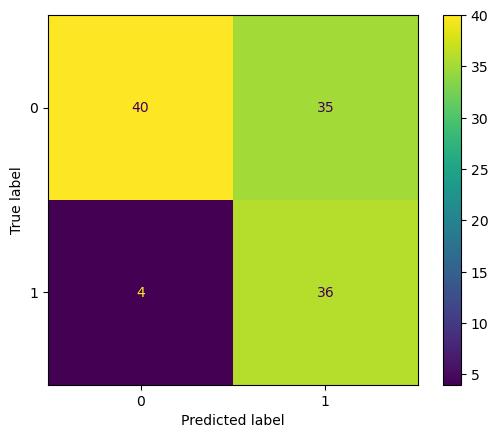

In [20]:
dt_model = RandomForestClassifier(min_samples_split= best_max_samples_split,n_estimators= best_max_estimators, max_depth= best_max_depth, random_state=my_random_state)
dt_model.fit(X_mix, y_mix)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Testset

Accuracy: 73.28%
Precision: 58.62%
Recall: 82.93%
F1: 68.69%


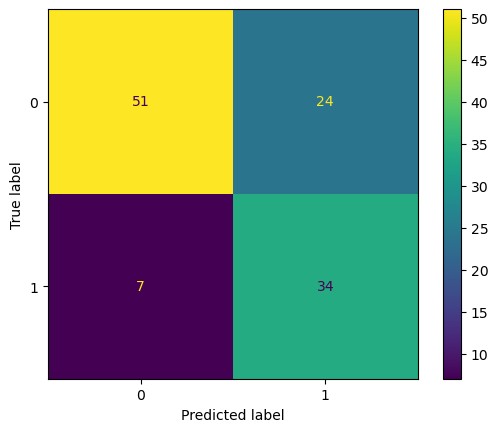

In [21]:
y_pred = dt_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

## Spalten mit vielen 0 Werten entfernen und Reihen mit 0 Werte entfernen

In [22]:
diabetes_data = pd.read_csv('diabetes.csv')
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=my_random_state, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full,random_state=my_random_state, test_size=0.5, stratify=y_test_full)

y_train.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
y_train.drop(y_train[X_train.Glucose == 0].index, inplace=True)
y_train.drop(y_train[X_train.BloodPressure == 0].index, inplace=True)
y_train.drop(y_train[X_train.BMI == 0].index, inplace=True)

X_train.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_train.drop(X_train[X_train.Glucose == 0].index, inplace=True)
X_train.drop(X_train[X_train.BloodPressure == 0].index, inplace=True)
X_train.drop(X_train[X_train.BMI == 0].index, inplace=True)

y_val.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_val.drop(columns=['SkinThickness', 'Insulin'], inplace=True)


y_test.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_test.drop(columns=['SkinThickness', 'Insulin'], inplace=True)

### DummyClassifier

In [23]:
from sklearn.dummy import DummyClassifier

In [24]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)
y_pred = dummy_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

Accuracy: 65.22%
Precision: 0.00%
Recall: 0.00%
F1: 0.00%


/Users/julsen/opt/miniconda3/envs/leoenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### DecisionTreeClassifier

In [25]:
best_max_depth = train_and_find_best_depth_decision(X_train, X_val, y_train, y_val, True)

--------------------
best max depth 4 has 75.00% recall.


Accuracy: 66.09%
Precision: 50.85%
Recall: 75.00%
F1: 60.61%


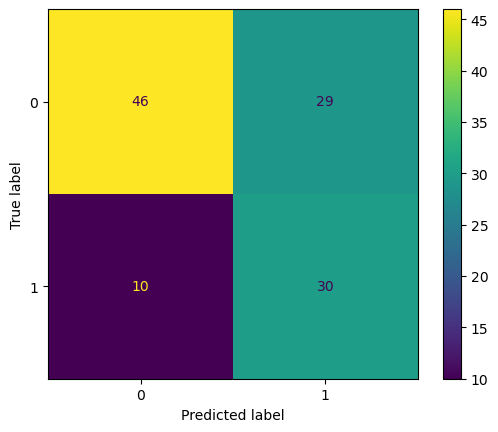

In [26]:
dt_model = DecisionTreeClassifier(max_depth=best_max_depth, random_state=my_random_state)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### RandomForestClassifier

In [27]:
best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)
best_max_estimators = train_and_find_best_estimators(X_train, X_val, y_train, y_val, best_max_depth, True)
best_max_samples_split = train_and_find_best_samples_split(X_train, X_val, y_train, y_val, best_max_depth, best_max_estimators, True)

--------------------
best max depth 12 has 65.00% recall and has 68.42% precision.
--------------------
best max estimators 99 has 65.00% recall and has 66.67% precision.
--------------------
best max sample split 6 has 65.00% recall and has 63.41% precision.


### Validierset

Accuracy: 74.78%
Precision: 63.41%
Recall: 65.00%
F1: 64.20%


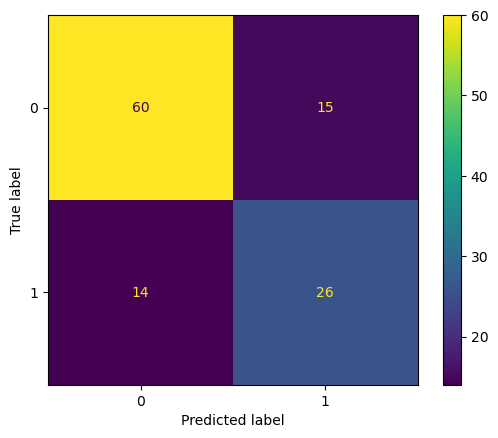

In [28]:
dt_model = RandomForestClassifier(min_samples_split= best_max_samples_split,n_estimators= best_max_estimators, max_depth= best_max_depth, random_state=my_random_state)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Testset

Accuracy: 84.48%
Precision: 81.08%
Recall: 73.17%
F1: 76.92%


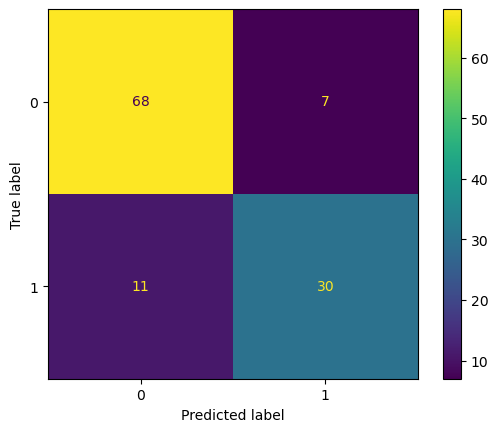

In [29]:
y_pred = dt_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

## 0 Werte durch Median ersetzen

In [30]:
diabetes_data = pd.read_csv('diabetes.csv')
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=my_random_state, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full,random_state=my_random_state, test_size=0.5, stratify=y_test_full)

simple_imputer = SimpleImputer(strategy='median',missing_values=0)
simple_imputer.fit(X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = simple_imputer.transform(X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [31]:
best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)
best_max_estimators = train_and_find_best_estimators(X_train, X_val, y_train, y_val, best_max_depth, True)
best_max_samples_split = train_and_find_best_samples_split(X_train, X_val, y_train, y_val, best_max_depth, best_max_estimators, True)

--------------------
best max depth 6 has 50.00% recall and has 76.92% precision.
--------------------
best max estimators 6 has 52.50% recall and has 65.62% precision.
--------------------
best max sample split 26 has 60.00% recall and has 66.67% precision.


### Validierset

Accuracy: 75.65%
Precision: 66.67%
Recall: 60.00%
F1: 63.16%


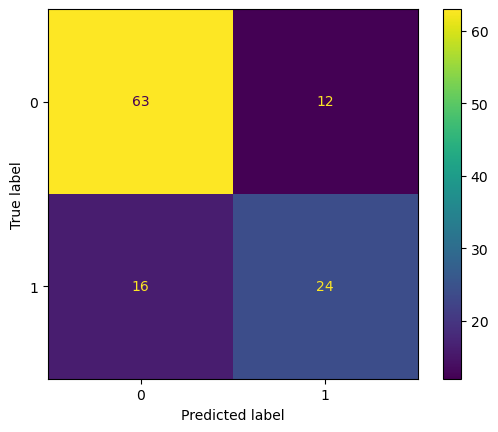

In [32]:
dt_model = RandomForestClassifier(min_samples_split= best_max_samples_split,n_estimators= best_max_estimators, max_depth= best_max_depth, random_state=my_random_state)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Testset

Accuracy: 76.72%
Precision: 69.44%
Recall: 60.98%
F1: 64.94%


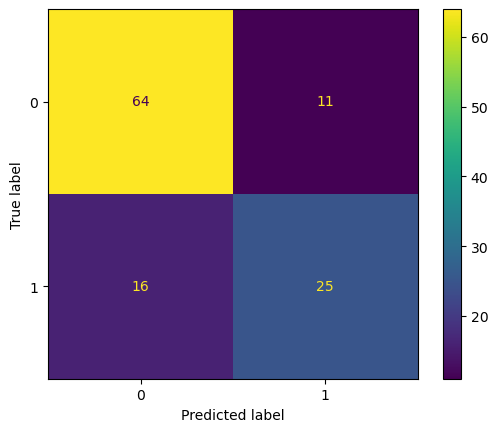

In [33]:
y_pred = dt_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

## 0 Werte mit Durchschnitt ersetzen

In [34]:
diabetes_data = pd.read_csv('diabetes.csv')
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=my_random_state, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full,random_state=my_random_state, test_size=0.5, stratify=y_test_full)

simple_imputer = SimpleImputer(strategy='mean',missing_values=0)
simple_imputer.fit(X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = simple_imputer.transform(X_train[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [35]:
best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)
best_max_estimators = train_and_find_best_estimators(X_train, X_val, y_train, y_val, best_max_depth, True)
best_max_samples_split = train_and_find_best_samples_split(X_train, X_val, y_train, y_val, best_max_depth, best_max_estimators, True)

--------------------
best max depth 6 has 50.00% recall and has 74.07% precision.
--------------------
best max estimators 99 has 50.00% recall and has 74.07% precision.
--------------------
best max sample split 2 has 50.00% recall and has 74.07% precision.


### Validierset

Accuracy: 76.52%
Precision: 74.07%
Recall: 50.00%
F1: 59.70%


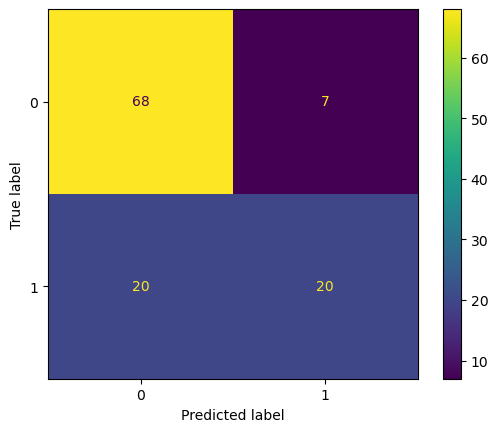

In [36]:
dt_model = RandomForestClassifier(min_samples_split= best_max_samples_split,n_estimators= best_max_estimators, max_depth= best_max_depth, random_state=my_random_state)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Testset

Accuracy: 81.03%
Precision: 82.76%
Recall: 58.54%
F1: 68.57%


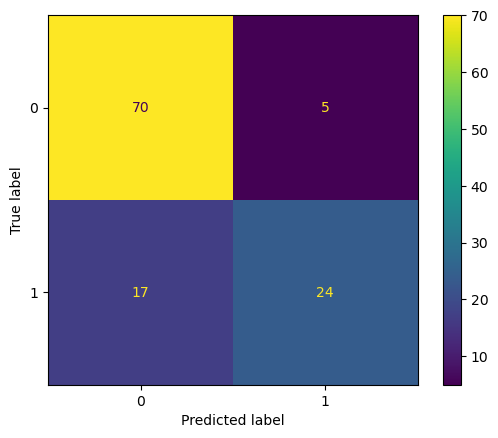

In [37]:
y_pred = dt_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

## Werte mit wenigen 0 Werten verwerfen und die restlichen mit dem Median ersetzen

In [38]:
diabetes_data = pd.read_csv('diabetes.csv')
X = diabetes_data[diabetes_data.columns[:-1]]
y = diabetes_data['Outcome']
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, random_state=my_random_state, test_size=0.3, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test_full, y_test_full,random_state=my_random_state, test_size=0.5, stratify=y_test_full)

y_train.drop(y_train[X_train.Glucose == 0].index, inplace=True)
y_train.drop(y_train[X_train.BloodPressure == 0].index, inplace=True)
y_train.drop(y_train[X_train.BMI == 0].index, inplace=True)

X_train.drop(X_train[X_train.Glucose == 0].index, inplace=True)
X_train.drop(X_train[X_train.BloodPressure == 0].index, inplace=True)
X_train.drop(X_train[X_train.BMI == 0].index, inplace=True)

simple_imputer = SimpleImputer(strategy='median',missing_values=0)

simple_imputer.fit(X_train[['SkinThickness', 'Insulin']])
X_train[['SkinThickness', 'Insulin']] = simple_imputer.transform(X_train[['SkinThickness', 'Insulin']])

In [39]:
best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)
best_max_estimators = train_and_find_best_estimators(X_train, X_val, y_train, y_val, best_max_depth, True)
best_max_samples_split = train_and_find_best_samples_split(X_train, X_val, y_train, y_val, best_max_depth, best_max_estimators, True)

--------------------
best max depth 6 has 47.50% recall and has 79.17% precision.
--------------------
best max estimators 24 has 52.50% recall and has 77.78% precision.
--------------------
best max sample split 6 has 55.00% recall and has 75.86% precision.


### Validierset

Accuracy: 78.26%
Precision: 75.86%
Recall: 55.00%
F1: 63.77%


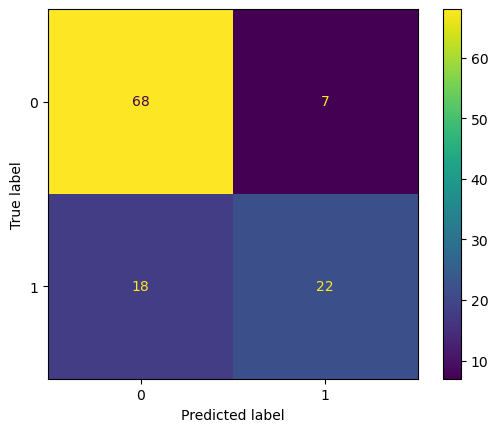

In [40]:
dt_model = RandomForestClassifier(min_samples_split= best_max_samples_split,n_estimators= best_max_estimators, max_depth= best_max_depth, random_state=my_random_state)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Testset

Accuracy: 75.86%
Precision: 74.07%
Recall: 48.78%
F1: 58.82%


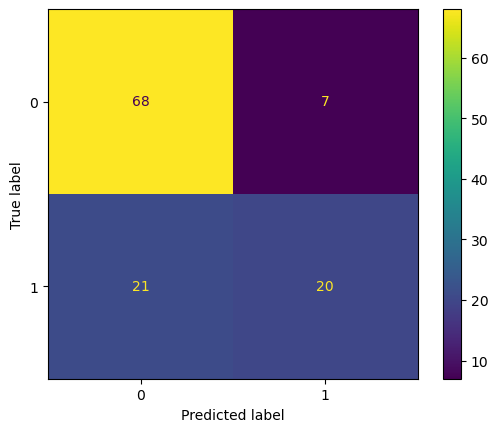

In [41]:
y_pred = dt_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

# Versuch der Fragen aufgeworfen hat

In [42]:
y_train.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
y_train.drop(y_train[X_train.Glucose == 0].index, inplace=True)
y_train.drop(y_train[X_train.BloodPressure == 0].index, inplace=True)
y_train.drop(y_train[X_train.BMI == 0].index, inplace=True)

X_train.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_train.drop(X_train[X_train.Glucose == 0].index, inplace=True)
X_train.drop(X_train[X_train.BloodPressure == 0].index, inplace=True)
X_train.drop(X_train[X_train.BMI == 0].index, inplace=True)

y_val.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_val.drop(columns=['SkinThickness', 'Insulin'], inplace=True)

y_test.drop(columns=['SkinThickness', 'Insulin'], inplace=True)
X_test.drop(columns=['SkinThickness', 'Insulin'], inplace=True)

my_random_state = 15

## Kombination OverSampling und UnderSampling

In [43]:
oversampler = RandomOverSampler(sampling_strategy=0.8, random_state=my_random_state)
X_mix, y_mix = oversampler.fit_resample(X_train, y_train)
display(y_mix.value_counts())
undersampler = RandomUnderSampler(sampling_strategy=1, random_state=my_random_state)
X_mix, y_mix = undersampler.fit_resample(X_mix, y_mix)
display(y_mix.value_counts())

0    333
1    266
Name: Outcome, dtype: int64

0    266
1    266
Name: Outcome, dtype: int64

In [44]:
best_max_depth = train_and_find_best_depth(X_mix, X_val, y_mix, y_val, True)
best_max_estimators = train_and_find_best_estimators(X_mix, X_val, y_mix, y_val, best_max_depth, True)
best_max_samples_split = train_and_find_best_samples_split(X_mix, X_val, y_mix, y_val, best_max_depth, best_max_estimators, True)

--------------------
best max depth 4 has 75.00% recall and has 57.69% precision.
--------------------
best max estimators 29 has 77.50% recall and has 60.78% precision.
--------------------
best max sample split 70 has 80.00% recall and has 59.26% precision.


### Validierset

Accuracy: 73.91%
Precision: 59.26%
Recall: 80.00%
F1: 68.09%


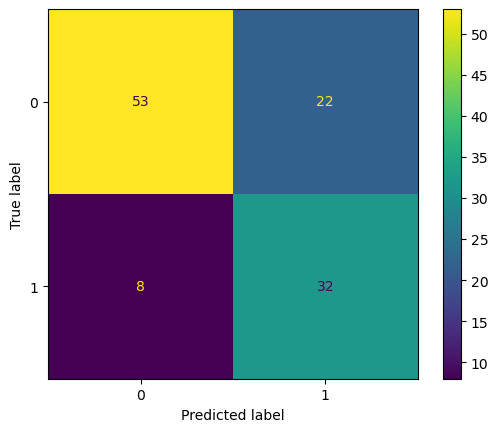

In [45]:
dt_model = RandomForestClassifier(min_samples_split= best_max_samples_split,n_estimators= best_max_estimators, max_depth= best_max_depth, random_state=my_random_state)
dt_model.fit(X_mix, y_mix)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Testset

Accuracy: 83.62%
Precision: 72.92%
Recall: 85.37%
F1: 78.65%


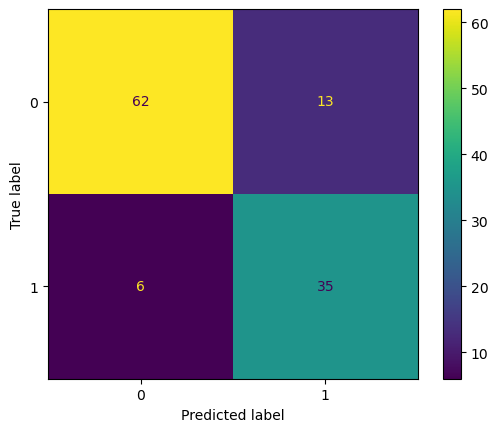

In [46]:
y_pred = dt_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

## RandomForestClassifier

In [47]:
best_max_depth = train_and_find_best_depth(X_train, X_val, y_train, y_val, True)
best_max_estimators = train_and_find_best_estimators(X_train, X_val, y_train, y_val, best_max_depth, True)
best_max_samples_split = train_and_find_best_samples_split(X_train, X_val, y_train, y_val, best_max_depth, best_max_estimators, True)

--------------------
best max depth 11 has 60.00% recall and has 66.67% precision.
--------------------
best max estimators 99 has 60.00% recall and has 64.86% precision.
--------------------
best max sample split 10 has 60.00% recall and has 68.57% precision.


### Validierset

Accuracy: 76.52%
Precision: 68.57%
Recall: 60.00%
F1: 64.00%


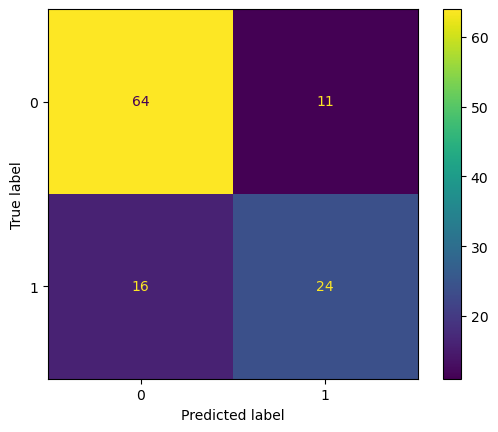

In [48]:
dt_model = RandomForestClassifier(min_samples_split= best_max_samples_split,n_estimators= best_max_estimators, max_depth= best_max_depth, random_state=my_random_state)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_val)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_val, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_val, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_val, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_val, y_pred)))

cm = confusion_matrix(y_val, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

### Testset

Accuracy: 83.62%
Precision: 80.56%
Recall: 70.73%
F1: 75.32%


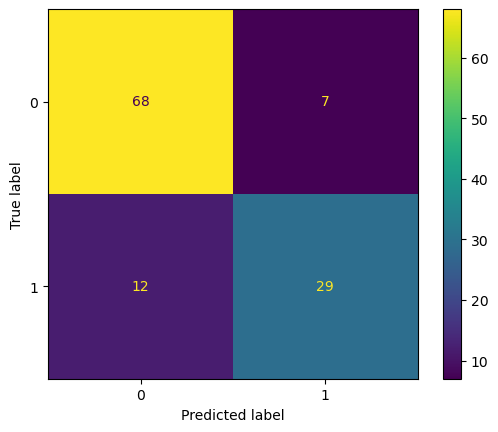

In [49]:
y_pred = dt_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred)                   
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

## Übersicht

![image](Overview.png)